# <center>Car Evaluation: Sale Prediction Model</center> <br>
### Classification Model

### Problem Statement: 
With various features of a car, predict the chances of selling that car.

This notebook covers:

EDA - to understand the Car Evaluation Dataset.<br>
Model Creation - Create Models based on classification data.<br>
Model Evaulation - Evaluate all the models and determine the best one based on various performance data.<br>

### Import Necessary Libraries 

In [1]:
# Load libraries
import numpy as np                                                 # Implements milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from sklearn import model_selection                                # Used Split the dataset into train and test
from sklearn.linear_model import LogisticRegression                # Used for LogisticRegression
from sklearn.tree import DecisionTreeClassifier                    
from sklearn.model_selection import GridSearchCV

# following imports are used for model evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### EDA <br>
This model uses the car evaluation dataset from the UCI website. https://archive.ics.uci.edu/ml/datasets/car+evaluation <br>
A copy of which is placed in github.<br>
Analysis will be done on this dataset to determine the feature variables, Train and Test data.

##### Load the dataset using readcv and attach column names.

In [2]:
# Load dataset
url = "https://raw.githubusercontent.com/sarika9377/carevaluate/master/car_evaluation.csv"
names = ['cost_price','maint_cost','doors','persons','boot_cap','safety','decision']
dataset = pd.read_csv(url, names=names)

##### Lets go thru some sample, to understand the data

In [3]:
dataset.head(5)

,cost_price,maint_cost,doors,persons,boot_cap,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
dataset.tail(10)

,cost_price,maint_cost,doors,persons,boot_cap,safety,decision
1718,low,low,5more,4,big,high,vgood
1719,low,low,5more,more,small,low,unacc
1720,low,low,5more,more,small,med,acc
1721,low,low,5more,more,small,high,good
1722,low,low,5more,more,med,low,unacc
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good
1727,low,low,5more,more,big,high,vgood


In [5]:
ds = dataset.copy()

In [6]:
dataset.describe()

,cost_price,maint_cost,doors,persons,boot_cap,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,low,low,3,2,small,low,unacc
freq,432,432,432,576,576,576,1210


##### Occurences and Number of 'Feature Variables'

In [7]:
dataset.shape

(1728, 7)

This dataset has 1727 occurences, 6 feature columns and 1 target columns.<br>
<b>Decision</b> is the target variable. <br>
<b>Cost_price, Maint_cost, Doors, Persons, Boot_cap, safety </b> are the feature variables.<br>
All the 7 variables are categorical, lets understand what they hold in them currently.

In [8]:
print('Cost Price: ', dataset['cost_price'].unique())
print('Maintenance Cost: ', dataset['maint_cost'].unique())
print('Number of Doors: ', dataset['doors'].unique())
print('Person Capacity: ', dataset['persons'].unique())
print('Boot Capacity: ', dataset['boot_cap'].unique())
print('Safety Rating: ', dataset['safety'].unique())

print('Decisions: ', dataset['decision'].unique())

Cost Price:  ['vhigh' 'high' 'med' 'low']
Maintenance Cost:  ['vhigh' 'high' 'med' 'low']
Number of Doors:  ['2' '3' '4' '5more']
Person Capacity:  ['2' '4' 'more']
Boot Capacity:  ['small' 'med' 'big']
Safety Rating:  ['low' 'med' 'high']
Decisions:  ['unacc' 'acc' 'vgood' 'good']


<b>Explanation of Target and Feature Variables </b><br>
1. Decision - This is our target variable, it can have values 'unacc' 'acc' 'good' 'vgood'. unacc is least chance of selling the car, vgood, high chance of selling the car <br>
2. Cost_Price - Buying price of the car. It can have values 'vhigh' 'high' 'med' 'low'.<br>
3. Maint_Price - Maintenance Price of the car. it can have values in 'vhigh' 'high' 'med' 'low'.<br>
4. Doors - Number of doors the car has. I can have values in '2' '3' '4' '5more'.<br>
5. Persons - Number of persons the car can accomodate. It can have values in '2' '4' 'more'.<br>
6. Boot_cap - Boot / Trunk Capacity. It can have values in 'small' 'med' 'big'.<br>
7. Safety - Safety Rating of the car. It has values in 'low' 'med' 'high'.<br>



##### Bar plots between each Feature Variable and Target variable<br>
Let's plot bar graphs to understand the releations between each of the feature variable and target variable.

###### Bar plot between Cost_Price vs Decision 

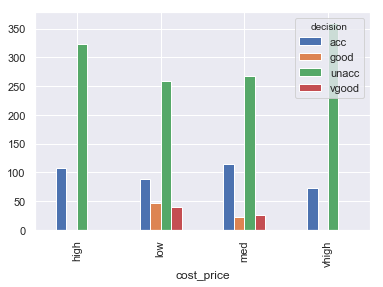

In [9]:
cost_impact = pd.crosstab(dataset['cost_price'], dataset['decision'])
cost_impact.plot(kind='bar',  stacked=False)

###### Bar plot between Maint_Cost vs Decision 

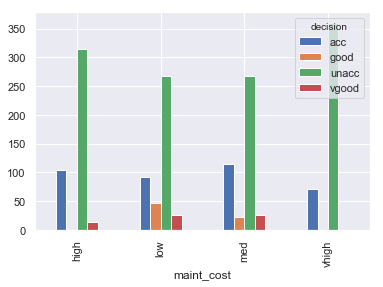

In [10]:
maint_impact = pd.crosstab(dataset['maint_cost'], dataset['decision'])
maint_impact.plot(kind='Bar', stacked=False)

###### Bar plot between Doors vs Decision 

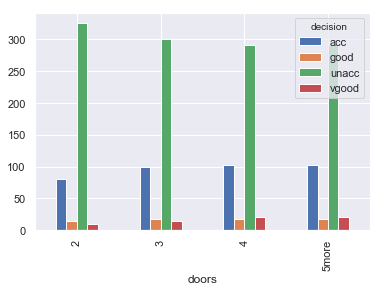

In [11]:
doors_impact = pd.crosstab(dataset['doors'], dataset['decision'])
doors_impact.plot(kind='Bar', stacked=False)

###### Bar plot between Persons vs Decision 

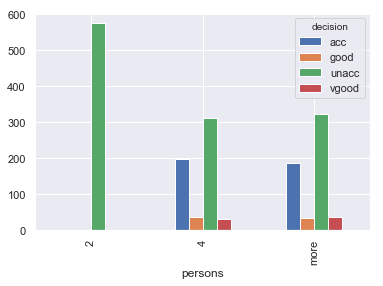

In [12]:
persons_impact = pd.crosstab(dataset['persons'], dataset['decision'])
persons_impact.plot(kind='Bar', stacked=False)

###### Bar plot between Boot_Cap vs Decision 

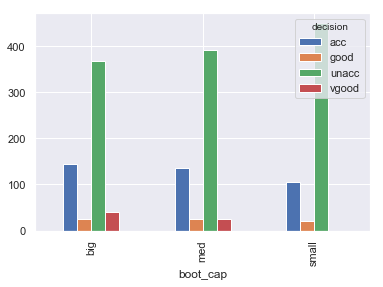

In [13]:
boot_impact = pd.crosstab(dataset['boot_cap'], dataset['decision'])
boot_impact.plot(kind='Bar', stacked=False)

###### Bar plot between Safety vs Decision 

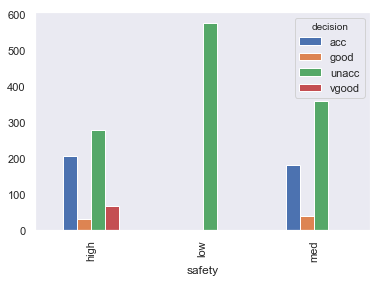

In [14]:
safety_impact = pd.crosstab(dataset['safety'], dataset['decision'])
safety_impact.plot(kind='Bar', stacked=False, grid=False)

###### Inference from the Bar Graphs <br>
Following are the effects of feature variables on the target variable. <br><br>
1. Cost_Price - Higher chance of sale, if cost_price is 'med' 'low'.<br>
2. Maint_Price - Higher chance of sale, if the maintenance price of the car is 'med' 'low'.<br>
3. Doors - Customers prefer, 3 or more doors.<br>
4. Persons - Accomodating 4 or more passengers, has the high chance of sale. <br>
5. Boot_cap - Higher chance of sale if the Boot / Trunk Capacity 'med' 'big'.<br>
6. Safety - 'high' 'med' safety rating of the car, makes it more attrative.<br>

##### Label Encoding<br>

To find the correlation of these variables, we need to do label encode them, so that we can create corr plot or heat map between them. Following logic will be used to encode these variables. <br>

#### Decision: 
0 - unacc<br>
1 - acc<br>
2 - good<br>
3 - vgood<br>

#### Cost_Price
0 - low<br>
1 - med<br>
2 - high<br>
3 - vhigh<br>

#### Maint_cost
0 - low<br>
1 - med<br>
2 - high<br>
3 - vhigh<br>

#### doors
2 - 2<br>
3 - 3<br>
4 - 4<br>
5 - 5more<br>

#### Persons
2 - 2<br>
4 - 4<br>
5 - more<br>

#### boot_cap
0 - small<br>
1 - med<br>
2 - big<br>

#### safety
0 - low<br>
1 - med<br>
2 - high<br>

In [15]:
dataset.decision.replace(('unacc', 'acc', 'good', 'vgood'), (0, 1, 2, 3), inplace = True)
dataset.cost_price.replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
dataset.maint_cost.replace(('low', 'med', 'high', 'vhigh'), (0, 1, 2, 3), inplace = True)
dataset.doors.replace(('2', '3', '4', '5more'), (2, 3, 4, 5), inplace = True)
dataset.persons.replace(('2', '4', 'more'), (2, 4, 5), inplace = True)
dataset.boot_cap.replace(('small', 'med', 'big'), (0, 1, 2), inplace = True)
dataset.safety.replace(('low', 'med', 'high'), (0, 1, 2), inplace = True)

Let's see the sample to see, if encoding is done properly.

In [16]:
dataset.head()

,cost_price,maint_cost,doors,persons,boot_cap,safety,decision
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


##### Correlation

Let's find if there are any correlation exists between these variables.

Text(0.5, 1.0, 'Correlation between features')

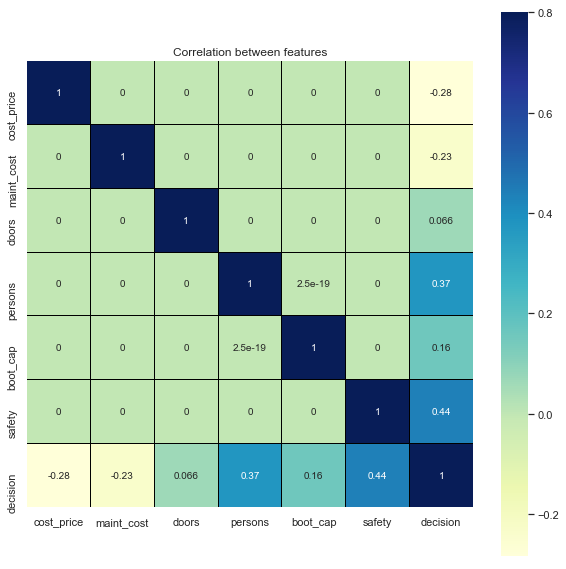

In [17]:
corr=dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

As per the heat map, there are no correlation that is greather than 0.75 exists.<br>
Also, there are no nulls in the dataset.<br>
We can go ahead and create the models with all the feature variables.<br>


# Model Creation

In this case study, we will be creating four classification models.<br>
1. MODEL1 - DecisionTreeClassifier with Entropy.<br>
2. MODEL2 - DecisionTreeClassifier with GINI. <br>
3. MODEL3 - LOGISTICREGRESSION.<br>
4. MODEL4 - DecisionTreeClassifier with GridSearchCV.<br><br>

Once these models were created, they will be evaluated and performance will be compared.

#### Setting up the Independent Variables

In [18]:
X = dataset.loc[:,dataset.columns != 'decision']
X.head()

,cost_price,maint_cost,doors,persons,boot_cap,safety
0,3,3,2,2,0,0
1,3,3,2,2,0,1
2,3,3,2,2,0,2
3,3,3,2,2,1,0
4,3,3,2,2,1,1


#### Setting up the Target Variable

In [19]:
Y = dataset.decision
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: decision, dtype: int64

#### Splitting X and y into training and test datasets - CrossValidation

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [21]:
print("Train-X: ",X_train.shape)
print("Test-X:  ", X_test.shape)
print("Train-Y: ", Y_train.shape)
print("Test-Y:  ", Y_test.shape)

Train-X:  (1382, 6)
Test-X:   (346, 6)
Train-Y:  (1382,)
Test-Y:   (346,)


In [22]:
X_train.head()

,cost_price,maint_cost,doors,persons,boot_cap,safety
1579,0,1,4,4,1,1
634,2,2,5,4,1,1
299,3,1,5,2,0,2
1085,1,1,2,2,1,2
1659,0,0,3,4,1,0


In [23]:
X_test.head()

,cost_price,maint_cost,doors,persons,boot_cap,safety
1233,1,0,3,5,0,0
592,2,2,3,5,2,1
625,2,2,5,2,1,1
1546,0,1,3,2,2,1
730,2,1,5,2,0,1


##### MODEL1 - DecisionTreeClassifier using Entropy

In [24]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(criterion='entropy')
model1.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
# finding the training and testing accuracy
print("Training Accuracy: ",model1.score(X_train, Y_train))
print("Testing Accuracy: ", model1.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9797687861271677


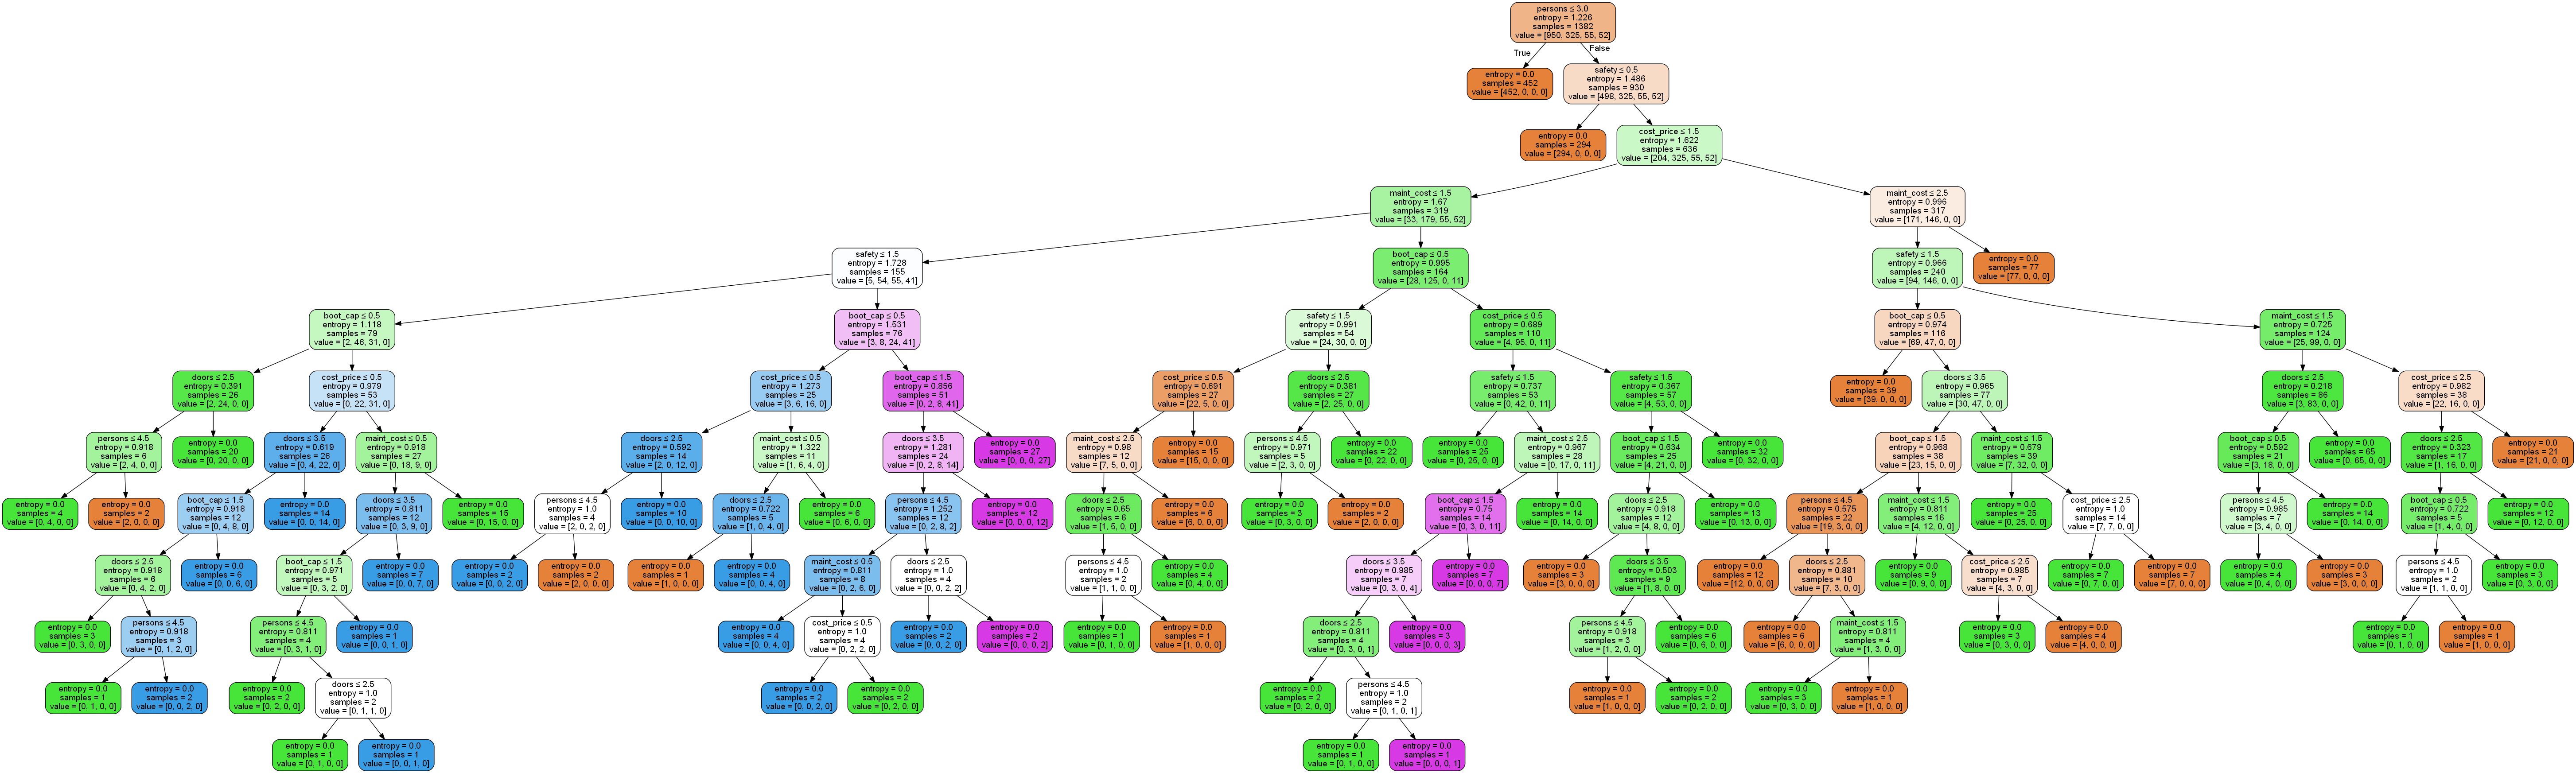

In [26]:
import os
os.environ['PATH'].split(os.pathsep)
os.environ['PATH'] += os.pathsep + "F:\\ProgramData\\Anaconda3\\Library\\bin\\graphviz"

import pydotplus
from IPython.display import Image
from sklearn import tree

dot_tree = tree.export_graphviz(model1, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

In [27]:
y_pred_test1 = model1.predict(X_test)

##### MODEL2 - DecisionTreeClassifier using Gini

In [28]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier(criterion='gini')
model2.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
# finding the training and testing accuracy
print("Training Accuracy: ",model2.score(X_train, Y_train))
print("Testing Accuracy: ", model2.score(X_test, Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.976878612716763


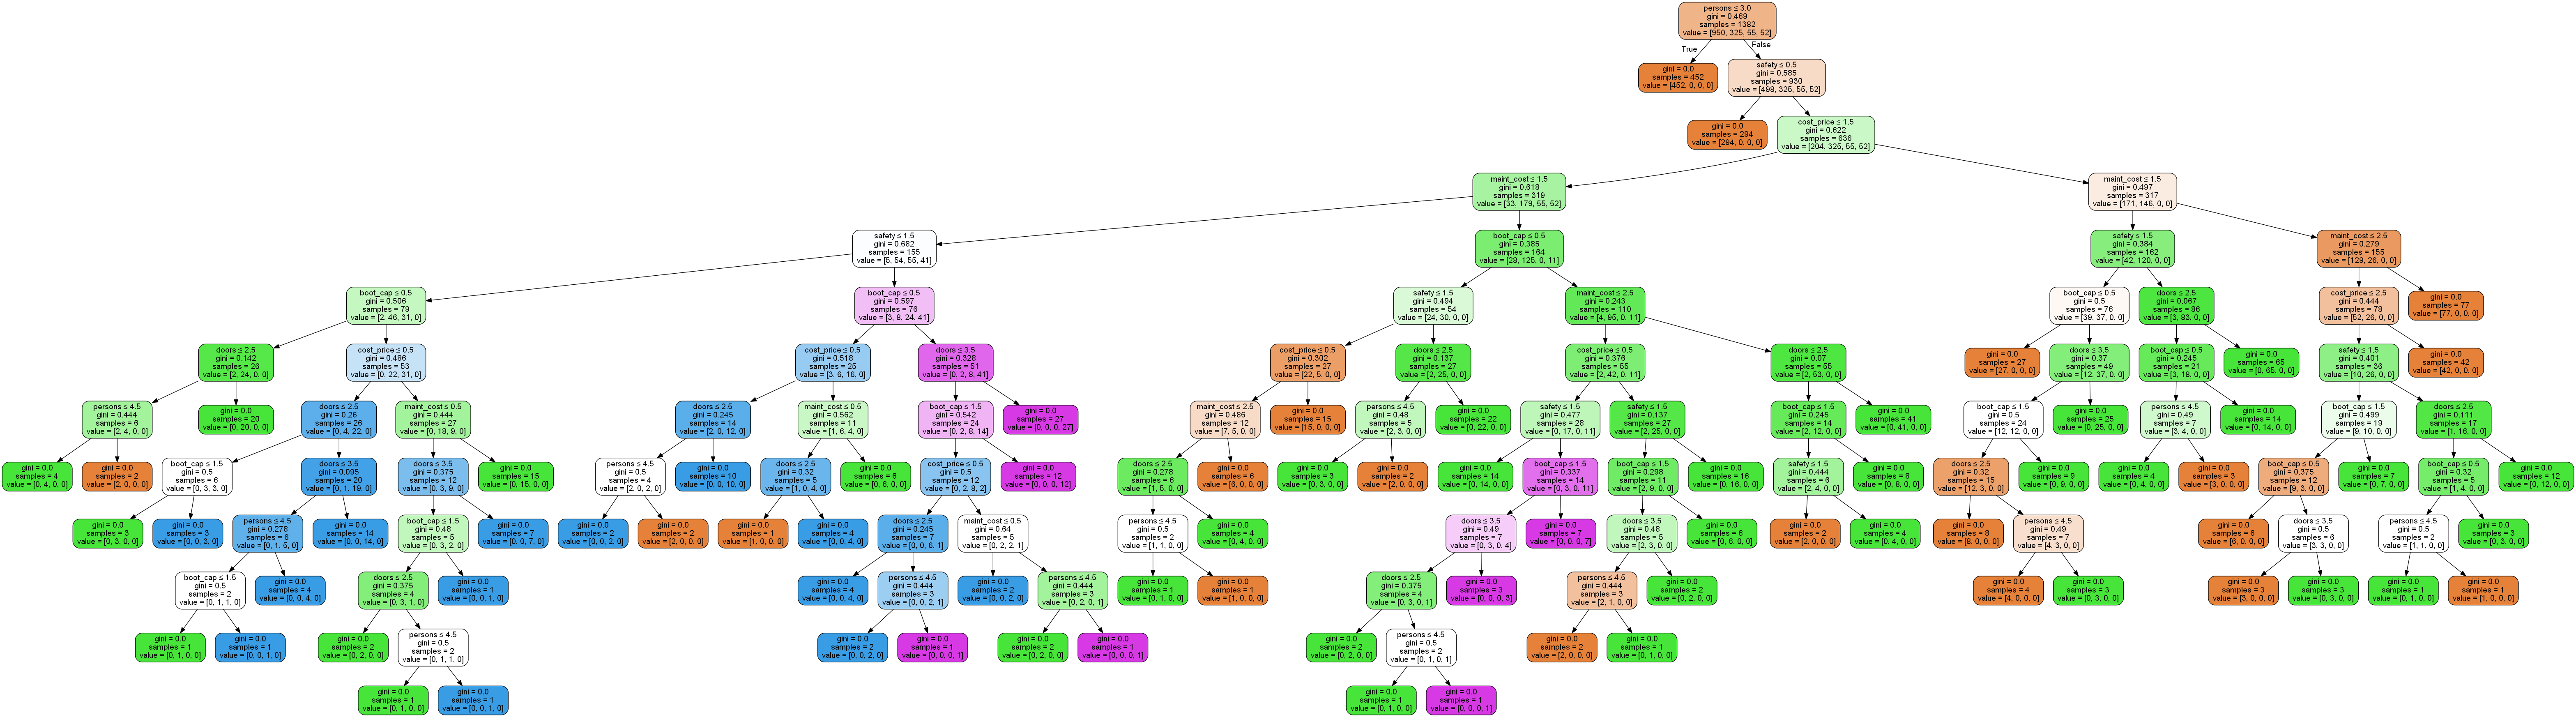

In [30]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model2, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())

In [31]:
y_pred_test2 = model2.predict(X_test)

##### MODEL3 - Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, Y_train)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
# finding the training and testing accuracy
print("Training Accuracy: ",model3.score(X_train, Y_train))
print("Testing Accuracy: ", model3.score(X_test, Y_test))

Training Accuracy:  0.8082489146164978
Testing Accuracy:  0.8092485549132948


In [34]:
y_pred_test3 = model3.predict(X_test)

##### MODEL4 - Decission Tree with GridSearchCV

In [56]:
decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_param = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

model4 = GridSearchCV(decision_tree_classifier,tree_param, cv=10, refit='AUC')
model4.fit(X_train, Y_train)

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 60), 'max_features': ['sqrt', 'log2', None]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
y_pred_test4 = model4.predict(X_test)

# Model Evaluation

Since this is a classification model, we can use the following parameters to gauge the model performance.<br>
1. Accuracy. <br>
2. Confusion Matrix. <br>
3. Precision. <br>
4. Recall. <br>
5. F1-Score. <br>

But before using accuracy, lets quickly check the counts of values in the target variable.

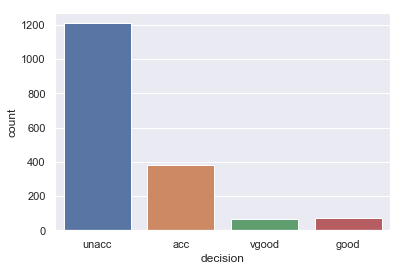

In [37]:
sns.countplot(ds['decision'])

In the 'decision' field, 'unacc' is the most occuring value, when compared to others. So 'accuracy' will not be a good score.

In [38]:
t_names=['unacc', 'acc', 'good', 'vgood']

##### Model1 - Evaulation

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, y_pred_test1))

confusion_matrix.index = ['Actual Unacc','Actual acc','Actual good', 'Actual VGood']
confusion_matrix.columns = ['Predicted Unacc','Predicted acc','Predicted good', 'Predicted VGood']

print(confusion_matrix)

              Predicted Unacc  Predicted acc  Predicted good  Predicted VGood
Actual Unacc              256              4               0                0
Actual acc                  1             57               1                0
Actual good                 1              0              13                0
Actual VGood                0              0               0               13


In [40]:
print(classification_report(Y_test, y_pred_test1, target_names=t_names))

              precision    recall  f1-score   support

       unacc       0.99      0.98      0.99       260
         acc       0.93      0.97      0.95        59
        good       0.93      0.93      0.93        14
       vgood       1.00      1.00      1.00        13

   micro avg       0.98      0.98      0.98       346
   macro avg       0.96      0.97      0.97       346
weighted avg       0.98      0.98      0.98       346



In [41]:
print("Model1 recall score: ", recall_score(Y_test, y_pred_test1, average=None))
print("Model1 precision score: ", precision_score(Y_test, y_pred_test1, average=None))
print("Model1 f1 score: ", f1_score(Y_test, y_pred_test1, average=None))

Model1 recall score:  [0.98461538 0.96610169 0.92857143 1.        ]
Model1 precision score:  [0.99224806 0.93442623 0.92857143 1.        ]
Model1 f1 score:  [0.98841699 0.95       0.92857143 1.        ]


###### Model2 - Evaulation

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, y_pred_test2))

confusion_matrix.index = ['Actual Unacc','Actual acc','Actual good', 'Actual VGood']
confusion_matrix.columns = ['Predicted Unacc','Predicted acc','Predicted good', 'Predicted VGood']

print(confusion_matrix)

              Predicted Unacc  Predicted acc  Predicted good  Predicted VGood
Actual Unacc              256              4               0                0
Actual acc                  1             57               0                1
Actual good                 1              0              13                0
Actual VGood                0              0               1               12


In [43]:
print(classification_report(Y_test, y_pred_test2, target_names=t_names))

              precision    recall  f1-score   support

       unacc       0.99      0.98      0.99       260
         acc       0.93      0.97      0.95        59
        good       0.93      0.93      0.93        14
       vgood       0.92      0.92      0.92        13

   micro avg       0.98      0.98      0.98       346
   macro avg       0.94      0.95      0.95       346
weighted avg       0.98      0.98      0.98       346



In [44]:
print("Model1 recall score: ", recall_score(Y_test, y_pred_test2, average=None))
print("Model1 precision score: ", precision_score(Y_test, y_pred_test2, average=None))
print("Model1 f1 score: ", f1_score(Y_test, y_pred_test2, average=None))

Model1 recall score:  [0.98461538 0.96610169 0.92857143 0.92307692]
Model1 precision score:  [0.99224806 0.93442623 0.92857143 0.92307692]
Model1 f1 score:  [0.98841699 0.95       0.92857143 0.92307692]


##### Model3 - Evaulation

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, y_pred_test3))

confusion_matrix.index = ['Actual Unacc','Actual acc','Actual good', 'Actual VGood']
confusion_matrix.columns = ['Predicted Unacc','Predicted acc','Predicted good', 'Predicted VGood']

print(confusion_matrix)

              Predicted Unacc  Predicted acc  Predicted good  Predicted VGood
Actual Unacc              243             13               3                1
Actual acc                 24             33               2                0
Actual good                 1             10               3                0
Actual VGood                0             12               0                1


In [46]:
print(classification_report(Y_test, y_pred_test3, target_names=t_names))

              precision    recall  f1-score   support

       unacc       0.91      0.93      0.92       260
         acc       0.49      0.56      0.52        59
        good       0.38      0.21      0.27        14
       vgood       0.50      0.08      0.13        13

   micro avg       0.81      0.81      0.81       346
   macro avg       0.57      0.45      0.46       346
weighted avg       0.80      0.81      0.80       346



In [47]:
print("Model1 recall score: ", recall_score(Y_test, y_pred_test3, average=None))
print("Model1 precision score: ", precision_score(Y_test, y_pred_test3, average=None))
print("Model1 f1 score: ", f1_score(Y_test, y_pred_test3, average=None))

Model1 recall score:  [0.93461538 0.55932203 0.21428571 0.07692308]
Model1 precision score:  [0.90671642 0.48529412 0.375      0.5       ]
Model1 f1 score:  [0.92045455 0.51968504 0.27272727 0.13333333]


##### Model4 - Evaulation

In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(Y_test, y_pred_test4))

confusion_matrix.index = ['Actual Unacc','Actual acc','Actual good', 'Actual VGood']
confusion_matrix.columns = ['Predicted Unacc','Predicted acc','Predicted good', 'Predicted VGood']

print(confusion_matrix)

              Predicted Unacc  Predicted acc  Predicted good  Predicted VGood
Actual Unacc              256              4               0                0
Actual acc                  1             57               1                0
Actual good                 1              0              13                0
Actual VGood                0              0               0               13


In [49]:
print(classification_report(Y_test, y_pred_test4, target_names=t_names))

              precision    recall  f1-score   support

       unacc       0.99      0.98      0.99       260
         acc       0.93      0.97      0.95        59
        good       0.93      0.93      0.93        14
       vgood       1.00      1.00      1.00        13

   micro avg       0.98      0.98      0.98       346
   macro avg       0.96      0.97      0.97       346
weighted avg       0.98      0.98      0.98       346



In [50]:
print("Model1 recall score: ", recall_score(Y_test, y_pred_test4, average=None))
print("Model1 precision score: ", precision_score(Y_test, y_pred_test4, average=None))
print("Model1 f1 score: ", f1_score(Y_test, y_pred_test4, average=None))

Model1 recall score:  [0.98461538 0.96610169 0.92857143 1.        ]
Model1 precision score:  [0.99224806 0.93442623 0.92857143 1.        ]
Model1 f1 score:  [0.98841699 0.95       0.92857143 1.        ]


###### Model Evaluation Conclusion

The confusion matrix created for the models gives the following data:<br>

1. MODEL1 - 339 True Predictions 7 False Predictions.<br>
2. MODEL2 - 338 True Predictions 8 False Predictions.<br>
3. MODEL3 - 280 True Predictions 66 False Predictions.<br>
4. MODEL4 - 339 True Predictions 7 False Predictions.<br><br>

MODEL1 & MODEL4 have the same performance parameters.<br>
MODEL2 almost have identical performance values.


# Predictions

In [51]:
def predictfn(i):
    switcher={
            0: "unacc",
            1: "acc",
            2: "good",
            3: "vgood"
            }
    return switcher.get(i,"Invalid")


In [52]:
'''
MODEL1 --
Predicting if the costumer's Decision for buying a car with following specifications will be good or not

Price : 1
Maintenance Cost = 1
Number of Doors = 2
Capacity = 4
Size of Luggage Boot = 2
safety = 3

'''
new_prediction = model1.predict(np.array([[1, 1, 2, 4, 2, 3]]))
Decision = predictfn(new_prediction[0])              # Model returns value as array, single element.
print("Decision = ", Decision)

Decision =  vgood


In [53]:
'''
MODEL2 --
Predicting if the costumer's Decision for buying a car with following specifications will be good or not

Price : 1
Maintenance Cost = 1
Number of Doors = 2
Capacity = 4
Size of Luggage Boot = 2
safety = 3

'''
new_prediction = model2.predict(np.array([[1, 1, 2, 4, 2, 3]]))
Decision = predictfn(new_prediction[0])              # Model returns value as array, single element.
print("Decision = ", Decision)

Decision =  vgood


In [54]:
'''
MODEL3 --
Predicting if the costumer's Decision for buying a car with following specifications will be good or not

Price : 1
Maintenance Cost = 1
Number of Doors = 2
Capacity = 4
Size of Luggage Boot = 2
safety = 3

'''
new_prediction = model3.predict(np.array([[1, 1, 2, 4, 2, 3]]))
Decision = predictfn(new_prediction[0])              # Model returns value as array, single element.
print("Decision = ", Decision)

Decision =  acc


In [55]:
'''
MODEL4 --
Predicting if the costumer's Decision for buying a car with following specifications will be good or not

Price : 1
Maintenance Cost = 1
Number of Doors = 2
Capacity = 4
Size of Luggage Boot = 2
safety = 3

'''
new_prediction = model4.predict(np.array([[1, 1, 2, 4, 2, 3]]))
Decision = predictfn(new_prediction[0])              # Model returns value as array, single element.
print("Decision = ", Decision)

Decision =  vgood


As expected, MODEL1, MODEL2, MODEL4, returned same value, MODEL3 returned a different one.

# END